# Решение Уравнения Пуассона методом быстрого преобразования Фурье

## Уравнение Пуассона

$\sum\limits_{0}^{N} \frac{\partial^2 \phi}{\partial x^2} = f, x \in D$<br>
Уравнение дополняется граничными условиями:<br>
$B(\phi) = F$, где $B$ - оператор, задающий граничные условия

## Основная идея

Рассматривается конечно-разностная схема: 
<br>
$\frac{\phi_{i+1, j, k} - 2\phi_{i, j, k} + \phi_{i-1, j, k}}{\delta x^2} + \frac{\phi_{i, j+1, k} - 2\phi_{i, j, k} + \phi_{i, j-1, k}}{\delta y^2} + \frac{\phi_{i, j, k+1} - 2\phi_{i, j, k} + \phi_{i, j, k-1}}{\delta z^2} = f_{i,j,k}, (i, j, k) \in D_{h}$, где $D_{h} = [0, N_x]\times[0, N_y]\times[0, N_z]$

Граничные условия:
$\phi_{0, j, k} = \phi_{N_x, j, k}$
$\phi_{i, 0, k} = \phi_{i, N_y, k}$
$\phi_{i, j, 0} = \phi_{i, j, N_z}$

Граничные условия выполнятся, если представить решение в виде дискретного обратного преобразования Фурье. Тогда применив аналогичное преобразование к правой части уравнения, получим выражение для определения коэффициентов Фурье решения:
$a_{l, m, n} = \frac{F_{l, m, n}}{4\left( \sin^2\left( \frac{l\pi}{N_{x}}\right) + \sin^2\left( \frac{m\pi}{N_{y}}\right) + \sin^2\left( \frac{n\pi}{N_{z}}\right) \right)}$

## Алгоритм

1. Сделать проекцию функции f на сетку
2. Применить к f n-мерное дискретное преобразование Фурье
3. Вычислить коэффициенты Фурье решения
4. По известным коэффициентам Фурье восстановить решение, использовав обратное преобразование Фурье

## Пример

В качестве примера уравнения Пуассона рассмотрим следующую задачу:
$\left\{\begin{matrix}
u_{xx} + u_{yy} = 512((-1+y)^2y^2-6x(-1+y)^2y^2-2x^3(1-6y+6y^2)+x^4(1-6y+6y^2)+x^2(1-6y+12y^2-12y^3+6y^4), 0 < x < 1, 0 < y < 1\\ 
u(0, y) = 0, u(1, y) = 0, 0 \leq y \leq 1\\ 
u(x, 0) = 0, u(x, 1) = 0, 0 \leq x \leq 1
\end{matrix}\right.$



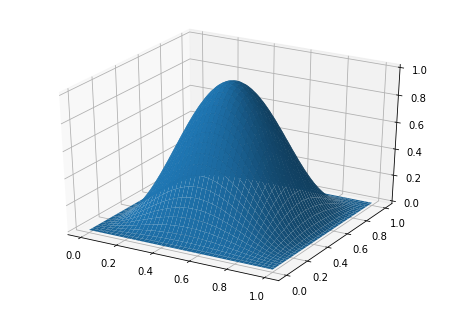

0.000217415140483


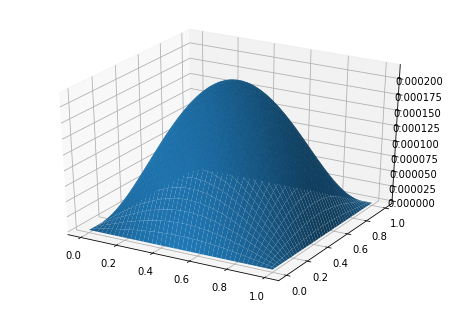

In [96]:
import scipy.fftpack as fft
import numpy as np
import math

import pylab
from mpl_toolkits.mplot3d import Axes3D

def F(x, y):
    N = x.size - 1
    z = np.zeros((N+1, N+1))
    for n in range(1, N):
        xTemp = x[n]
        for m in range(1, N):
            yTemp = y[m]
            sum = (-1+yTemp)**2 * yTemp**2 - 6*xTemp*(-1+yTemp)**2 * yTemp**2 - 2*xTemp**3 * (1-6*yTemp+6*yTemp**2) + xTemp**4 * (1-6*yTemp+6*yTemp**2)+ xTemp**2 * (1 - 6*yTemp+12*yTemp**2-12*yTemp**3+6*yTemp**4)
            z[n][m] = 512 * sum
    #print(z[N-1, N-1])
    return z 

#точное решение
def exactSolution(x, y):
    return 256 * x**2 * (1-x)**2 * y**2 * (1-y)**2

    
N = 128
x = np.linspace(0, 1, N + 1)
y = np.linspace(0, 1, N + 1)

h = x[1] - x[0]
u = np.zeros((N+1, N+1))
f = h**2 * F(x, y)

f = f[1:-1, 1:-1]

#применяем прямое преобразование Фурье
DSTf = fft.dst(fft.dst(f, type=1, axis=0), type=1, axis=1)

#вычисляем коэффициенты
fourierCoeff = np.zeros((N-1, N-1))
for n in range(1, N):
    for m in range(1, N):
        fourierCoeff[n-1][m-1] = - 0.25 * DSTf[n-1][m-1]/(\
            math.sin(math.pi*n/2/N)**2 + math.sin(math.pi*m/2/N)**2)
        
#применяем обратное преобразование

u[1:-1, 1:-1] = fft.idst(fft.idst(fourierCoeff, type=1, axis=0), type=1, axis=1)/(2*N)**2
#print(fft.idst(fft.dst(f))[5][5]/f[5][5])

xGrid, yGrid = np.meshgrid(x, y)
fig1 = pylab.figure()
axes = Axes3D(fig1)
axes.plot_surface(xGrid, yGrid, exactSolution(xGrid, yGrid))
pylab.show()

fig2 = pylab.figure()
axes = Axes3D(fig2)
axes.plot_surface(xGrid, yGrid, u - exactSolution(xGrid, yGrid))

print(np.abs(u - exactSolution(xGrid, yGrid)).max())

pylab.show()

<img src="image.jpg">

In [81]:
DSTf.shape

(33, 33)

In [82]:
u.shape

(33, 33)